In [28]:
!pip install tfinputfn

  Preparing metadata (setup.py) ... done
  Created wheel for tfinputfn: filename=tfinputfn-2.0.0-py3-none-any.whl size=2695 sha256=b093970bf9961d024b6d3459659d1e564f681bcd887bee34a8112123f9a7d191
  Stored in directory: /Users/vishnusatheesh/Library/Caches/pip/wheels/a3/8e/5f/c609d3d0d65d4bfe1f312048220d28b34bf6af15fb6e1bbbe3
Successfully built tfinputfn


In [32]:
import tensorflow as tf
import tfinputfn as tfi

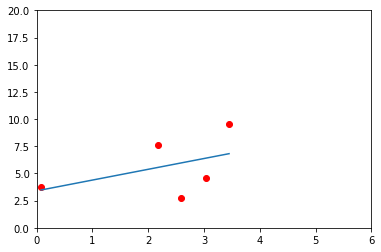

In [29]:
x = np.random.rand(5) * 5
y = np.random.rand(5) * 10
z = np.random.rand(5) * 10
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])
plt.plot(np.unique(x) , np.poly1d( np.polyfit(x,y,1)) (np.unique(x)) )
plt.show()


In [1]:
import pandas as pd

In [10]:
x_train = pd.read_csv('train.csv') # training data
x_eval = pd.read_csv('eval.csv') # testing data

y_train = x_train.pop('survived')
y_eval = x_eval.pop('survived')

x_train


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


<AxesSubplot:>

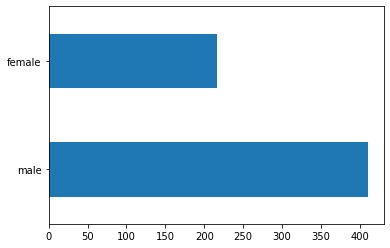

In [12]:
x_train.sex.value_counts().plot(kind='barh')

<AxesSubplot:xlabel='sex'>

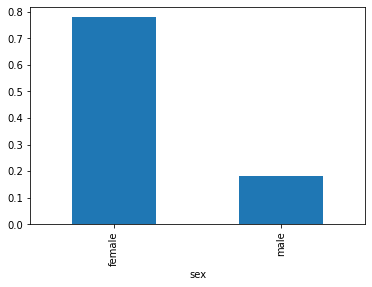

In [15]:
pd.concat([x_train,y_train],axis=1).groupby('sex').survived.mean().plot(kind='bar')

In [17]:
x_eval.shape

(264, 9)

In [18]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

In [26]:
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    voc = x_train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,voc))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
    
feature_columns


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [48]:
train_input_fn = tfi.make_input_fn(x_train, y_train,num_epochs=20) 
eval_input_fn = tfi.make_input_fn(x_eval, y_eval, num_epochs=1, shuffle=False)      

In [39]:
model = tf.estimator.LinearClassifier(feature_columns=feature_columns)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [49]:
model.train(train_input_fn)
result = model.evaluate(eval_input_fn)
result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


2022-07-14 18:54:52.904437: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-14 18:54:52.904465: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-14 18:54:52.931124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 18:54:52.946608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 18:54:52.958837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 18:54:52.97

INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 600...
INFO:tensorflow:Saving checkpoints for 600 into /var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt.


2022-07-14 18:54:54.213966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:/var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt-600.index
INFO:tensorflow:0
INFO:tensorflow:/var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt-600.data-00000-of-00001
INFO:tensorflow:0
INFO:tensorflow:/var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt-600.meta
INFO:tensorflow:600
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 600...


2022-07-14 18:54:54.846777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 18:54:54.858366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:loss = 0.5787077, step = 600


2022-07-14 18:54:55.096457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:global_step/sec: 77.4895
INFO:tensorflow:loss = 0.4076742, step = 700 (1.291 sec)
INFO:tensorflow:global_step/sec: 91.8001
INFO:tensorflow:loss = 0.36601105, step = 800 (1.089 sec)
INFO:tensorflow:global_step/sec: 91.9215
INFO:tensorflow:loss = 0.43626603, step = 900 (1.088 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1000...
INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt.
INFO:tensorflow:/var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt-1000.data-00000-of-00001
INFO:tensorflow:0
INFO:tensorflow:/var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt-1000.meta
INFO:tensorflow:600
INFO:tensorflow:/var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt-1000.index
INFO:tensorflow:600
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1000...
INFO:tensorflow:Loss for final step: 0.43195423.
INFO:tenso

2022-07-14 18:55:00.531810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-14 18:55:00.531826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-14 18:55:00.564527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 18:55:00.576578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 18:55:00.587957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 18:55:00.61

INFO:tensorflow:Inference Time : 0.68054s
INFO:tensorflow:Finished evaluation at 2022-07-14-18:55:01
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7765152, accuracy_baseline = 0.625, auc = 0.83758795, auc_precision_recall = 0.79547095, average_loss = 0.47169706, global_step = 1000, label/mean = 0.375, loss = 0.4575378, precision = 0.6923077, prediction/mean = 0.40767702, recall = 0.72727275
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/5v/0lzcxj5x4ks8kyfnvbf83n8w0000gn/T/tmpw53ynafx/model.ckpt-1000


2022-07-14 18:55:01.087580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


{'accuracy': 0.7765152,
 'accuracy_baseline': 0.625,
 'auc': 0.83758795,
 'auc_precision_recall': 0.79547095,
 'average_loss': 0.47169706,
 'label/mean': 0.375,
 'loss': 0.4575378,
 'precision': 0.6923077,
 'prediction/mean': 0.40767702,
 'recall': 0.72727275,
 'global_step': 1000}

In [ ]:

res = list(model.predict(eval_input_fn))

In [60]:
index = 0


    

for i in range(x_eval.size):
    print(x_eval.iloc[index])
    
    print(res[index]['probabilities'][1])
    if(res[index]['probabilities'][1] > 0.4):
        print("Survived")
    else:
        print("Not survived")
    print("Actual: ",y_eval.iloc[index])
    print("\n\n\n")
    index += 1


sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0.07482819
Not survived
Actual:  0




sex                          male
age                          54.0
n_siblings_spouses              0
parch                           0
fare                      51.8625
class                       First
deck                            E
embark_town           Southampton
alone                           y
Name: 1, dtype: object
0.52239424
Survived
Actual:  0




sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southamp

IndexError: single positional indexer is out-of-bounds